
# Introduction to Machine Learning/ Data Science - Midterm  [ __ / 70 marks]

## Name and Student Number: `<Sahil Rehman>`| `<251143102>` 

<img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRyUsvp8lFRGIPJc6R5KIfzr2Y-3uklW1hZLg&usqp=CAU" width=600>

## Before you start...

* This midterm is Open-book (you can use any notes, jupyter notebooks, the internet, etc.). The only thing you're not permitted to do is communicate with others in any way (inside or outside of the classroom).
* You will have 2 hours to fill and submit this notebook via OWL --> Assignments --> "Midterm - Introduction to ML/DS". Read each question carefully and try your best. If you have a question, raise your hand and we will attend to you.

## Before you submit...

* Make sure that you restart the kernel, then re-run the whole notebook to ensure that there are no errors. If everything checks out, you can submit your notebook via OWL --> Assignments --> "Midterm - Introduction to ML/DS".

In [1]:
# Put all imports here...
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.optimize as so

from sklearn.linear_model import LinearRegression, Lasso, LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import confusion_matrix, roc_curve, ConfusionMatrixDisplay
from IPython.display import display
from scipy.special import gammaln

In [2]:
# Check package versions...
import numpy
import pandas
import matplotlib
import scipy
import sklearn

print(numpy.__version__)      #1.21.3
print(pandas.__version__)     #1.3.4
print(matplotlib.__version__) #3.4.3
print(scipy.__version__)      #1.7.1
print(sklearn.__version__)    #0.24.2

# to update any package (i.e. numpy):
#!pip install --upgrade numpy --user

1.21.3
1.3.4
3.4.3
1.7.1
0.23.2


## Additional comments...
* Where possible I have also indicated some lecture code or assignment code which may be helpful to look at; again, this is to help you and not a requirement to follow.
* Regarding class feedback on reshape, I will tell you that none of the code in the solutions requires reshape (i.e. none of the code that isn't already written). However, if you find that reshape is required for your implementation you are of course welcome to use it. 
* In some cases I have included commented code which you can use to test that your function is working as it was intended. You do not need to use these. Please comment this code after you've used it.

## Part 1: Linear Regression [ _ /31 marks]

Let's start by considering **Least Absolute Deviation** (L1) regression in order to fit a line to some data. Here we will be using the csv file, "`part1.csv`". 

*Potentially Helpful Code for this part*: Assignment 1 code ("A1_S.ipynb") and the Week 1 to 6 review code ("Week1-6-Code_ReviewF.ipynb") 

### Question 1.1 [ _ /1 mark]

The data (`part1.csv`) has been read into a pandas dataframe (`df1`) for you. Plot this data in a scatterplot (you do not need axes labels or a title).

          x          y
0  0.000000   1.961463
1  0.689655  13.566947
2  1.379310 -13.894509
3  2.068966  -7.799297
4  2.758621 -17.544468


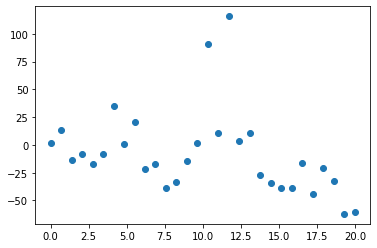

In [3]:
# Read the data into a dataframe
df1 = pd.read_csv("part1.csv")
print(df1.head())
# Plot the data in a scatterplot [ /1 mark]
# ****** your code here ****** 
plt.scatter(df1.x,df1.y)

### Question 1.2 [ _ /10 marks]

Create a line of best fit using **L1 (LAD) regression** (consider $\mathbf{\hat{y} = Xb}$). Define your loss function explicitly in a function called `l1loss`. Plot the data (scatterplot) with the line of best fit (from your regression) on the same graph. Also calculate and print the R-squared value (use only the **fit** data). 

Recall the loss function for LAD regression: 

$$Loss_{L1} = \sum_{i=1}^{n} \lvert {y_i-\hat{y_i}} \rvert$$

Also consider the following system of equations:

\begin{equation}
\begin{bmatrix}
\hat{y_0}\\
\hat{y_1}\\
.. \\
\hat{y_n}
\end{bmatrix}
= 
\begin{bmatrix}
1 & x_0\\
1 & x_1\\
.. & .. \\
1 & x_n
\end{bmatrix}
\begin{bmatrix}
b_0\\
b_1\\
\end{bmatrix}
\end{equation}

b-predicted: [ 1.96146298 -2.126679  ]
R-squared: 0.022048464137789936
[  1.96146298   0.49478782  -0.97188735  -2.43856252  -3.90523769
  -5.37191286  -6.83858803  -8.3052632   -9.77193837 -11.23861354
 -12.70528871 -14.17196388 -15.63863905 -17.10531422 -18.57198939
 -20.03866456 -21.50533973 -22.97201489 -24.43869006 -25.90536524
 -27.37204041 -28.83871557 -30.30539073 -31.77206592 -33.23874108
 -34.70541625 -36.17209141 -37.6387666  -39.10544176 -40.57211693]


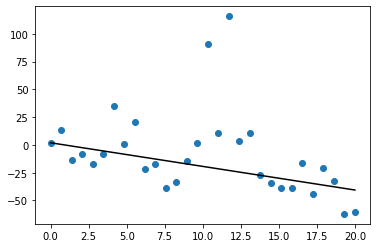

In [4]:
# From your dataframe, create x, X (design matrix) and y [ /2 marks]
# ****** your code here ****** 
# ****** your code here ****** 
# ****** your code here ****** 
x=df1.x
X = np.c_[np.ones(len(x)),x]
y=df1.y

# Create the loss function for l1 (l1loss) [ /2 marks]
def l1loss(b,X,y):
    # ****** your code here ****** 
    loss=np.sum(np.abs(y-np.dot(X,b)))
    return loss

# Uncomment this part if you want to check your function
#check_func_b = np.array([1,1.2])
#check_func_X = np.array([[1,2],[1,3.2]])
#check_func_y = np.array([3,2])
#print(l1loss(check_func_b,check_func_X,check_func_y)) 
# The result of the print statement should be 3.2399999999999998

# Use so.minimize to get bpr (your prediction for b) [ /1 mark]
# You can consider a starting b-value of np.zeros((2,1))
# You do not need to specify a particular solver 
# ****** your code here ****** 
def lad_fit(X,y):
    b_pred = so.minimize(l1loss,np.zeros((2,1)),args=(X,y)).x
    return b_pred

bpr = lad_fit(X,y)
print(f"b-predicted: {bpr}")

# Now, compute and print R-squared (use bpr, X, and y) [ /2 marks]
# ****** your code here ****** 
# ****** your code here ****** 
R2 = lambda y, X, b: 1-(np.sum((y-(np.dot(X,b)))**2))/np.sum((y-np.mean(y))**2) 
print(f"R-squared: {R2(y,X,bpr)}")
# Compute ypr (your y-prediction, given bpr and X) [ /1 mark]
# ****** your code here ****** 
ypr = np.dot(X, bpr)
print(ypr)
# Plot the data with your line of best fit [ /2 marks]
# You do not need to create new x-values here.
# ****** your code here ****** 
# ****** your code here ****** 
plt.scatter(x,y)
plt.plot(x,ypr, color='black')

### Question 1.3 [ _ /3 marks]

If we were to repeat Question 1.2 using L2 (Ordinary Least Squares) regression (instead of LAD), would the resulting R-squared value of the fit be **higher** or **lower**? [ _ /1 mark] Why is this? [ _ /2 marks]

In [5]:
# L2 with sklearn

# since X has column of 1's, set fit_intercept=False
lin = LinearRegression(fit_intercept=False).fit(X,y)

# .score gets the R-squared value for your fit 
print(f"R-squared {lin.score(X,y)}")


R-squared 0.11151238568632083


**Your answer**:The resulting value for R2 here using L2 is higher than L1.
The L1 loss tends to shrink the coefficients to zero whereas L2 tends to shrink the coefficients evenly.So, L1 is therefore useful for feature selection, as we can drop any variables associated with the coefficients that go to zero. L2, on the other hand, is useful when you have collinear/codependent features.
The R-Squared for L2 will be higher, because in the L2 we are minimizing the difference that is (y-yhat)**2 . This part will approach to zero thus, R2 will be increased.

### Question 1.4 [ _ /5 marks]

Let us now consider the pseudo-Huber (p-Huber) loss function (which combines L1 and L2) with $\delta = 4$. This loss function is defined as the following:

$$ Loss_{p-Huber}= \sum_{i=1}^{n}{\delta}^2 \Bigg(\sqrt{1+\Bigg(\frac{y_i-\hat{y_i}}{\delta}\Bigg)^2} -1\Bigg)  $$

Define a function called `phuber_loss` which returns pseudo-Huber loss, given $\mathbf{b}$, design matrix $\mathbf{X}$, and $\mathbf{y}$. As we previously did, use $\mathbf{\hat{y} = Xb}$. 

Note: You do not need to plot anything or report an R-squared value here (just fill in the function). You can check your function with some provided code.

In [6]:
# define the phuber_loss function here [ /5 marks]
def phuber_loss(b,X,y):
    # ****** your code here ****** 
    loss=np.sum(16*((np.sqrt(1+(((y-np.dot(X,b))/4)**2)))-1))
    return loss

# Uncomment this part if you want to check your function
#check_func_b = np.array([1,1.2])
#check_func_X = np.array([[1,2],[1,3.2]])
#check_func_y = np.array([3,2])
#print(phuber_loss(check_func_b,check_func_X,check_func_y)) 
# The result of the print statement should be 3.7024817484711576

### Question 1.5 [ _/3 marks]

The following plot shows fits (with and without outliers) from *two Regression techniques*, `Regression A` and `Regression B`. *Based on this plot*, which of these Regression techniques is **more robust** to outliers: Regression A or Regression B? [ _ /1 mark] Why? [ _ /2 marks] 

![title](part1_5.png)

**Your answer**:Regression B is more robust to the outliers since there is less deviation in the model fit line with and without outliers as compare to Regression A.
It means regression B is effected less by the presence of outliers as comapre to regression A.

### Question 1.6 [ _ /9 marks]

Now consider **L2 (OLS) Regression** and **the Bootstrap** for the data (i.e. the `part1.csv` data we've used throughout Question 1). The code for a single L2 Regression is provided below (using sklearn's `LinearRegression()`). Since the design matrix has a column of 1's, notice I set `fit_intercept=False`. 

*Your task*: 
* Create and plot **20 Boostrap predictions** (i.e. 20 Bootstrapped L2 fits). More specifically, plot the data, the provided prediction line, and your 20 Bootstrap predictions in a single plot. Most of the code is provided, but you will need to fill in the indicated parts.
* A 95% Confidence Interval around the provided L2 Regression prediction has been computed and plotted (the prediction line plus a 95% confidence interval margin around this line). You will need to evaluate this margin at x=0 to create a 95% Confidence Interval for the prediction (at `x=0`).

#### Provided code (you don't need to write anything in here):

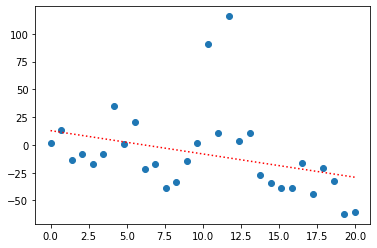

In [7]:
# Here is the provided code for an L2 (OLS) Regression on `part1.csv`:

# Specify x_ols, X_ols, y_ols ("x_ols" stands for "x, ordinary least squares")
x_ols = df1.x.values
X_ols = np.c_[np.ones(len(x_ols)), x_ols]
y_ols = df1.y.values

# I created a LinearRegression object (lin_ols) and fit it to the data
lin_ols = LinearRegression(fit_intercept=False).fit(X_ols,y_ols)

# I created a prediction line (ypr_ols), then plotted it with new data
xnew_ols = np.linspace(min(x_ols),max(x_ols),len(x_ols))
Xnew_ols = np.c_[np.ones(len(xnew_ols)), xnew_ols]
ypr_ols = lin_ols.predict(Xnew_ols)
# You can uncomment this to see the plot
plt.scatter(x_ols, y_ols) 
plt.plot(xnew_ols, ypr_ols, linestyle='dotted', color='red')

#### Code for the bootstrap (Complete 4 lines of this code) [ _ /5 marks]:

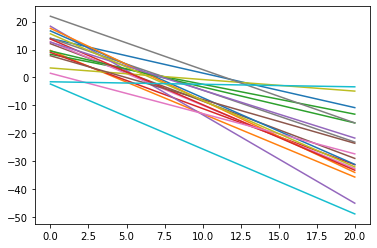

In [8]:
# Fill in the rest of this function (boot) to compute the bootstrap predictions

# This function should take a dataframe "S" as input. It returns "boot_ypr", a 2d 
# array which contains "num_iterations" samples of size "sample_size"
def boot(S):
    # Specify the number of bootstrap samples you'll take
    num_iterations =1000 # ****** your code here ****** [ /1 mark]   
    
    # Specify the size of each bootstrap prediction sample
    sample_size =len(S) # ****** your code here ****** [ /1 mark]

    #initialize empty array of bootstrap parameter estimates
    boot_ypr = np.zeros((num_iterations,sample_size))

    for i in range(num_iterations):
        # create a bootstrap sample from the dataframe S
        S_star =S.sample(sample_size, replace=True) # ****** your code here ****** [ /2 marks]

        # create Sx_ols, SX_ols, and Sy_ols for your bootstrap sample
        Sx_ols = S_star.x.values
        SX_ols = np.c_[np.ones(len(Sx_ols)), Sx_ols]
        Sy_ols = S_star.y.values
        
        # create a linear regression object, fit to the data
        Slin_ols = LinearRegression(fit_intercept=False)
        Slin_ols.fit(SX_ols,Sy_ols)
        
        # create Sx_new, SX_new (new data) for our predictions
        Sx_new = np.linspace(0,20,30)
        SX_new = np.c_[np.ones(len(Sx_new)), Sx_new]
        
        # compute a prediction from the bootstrap design matrix
        Sypr_ols = Slin_ols.predict(SX_new)
        boot_ypr[i,:] =Sypr_ols # ****** your code here ****** [ /1 mark]
    
    return boot_ypr

# Here we are plotting 20 bootstrap samples
boot_x_new = np.linspace(0, 20, 30)
boot_X_new = np.c_[np.ones(len(boot_x_new)), boot_x_new]
boot_ypred = boot(df1)

for i in range(20):
    plt.plot(boot_x_new, boot_ypred[i,:])

#### Code for the 95% Confidence Interval (Complete 2 lines of this code) [ _ /4 marks]:

Confidence interval: [-23.114298792216115,0.473943976699279]
Confidence interval: [27.22484771716095,-5.947992925708316]


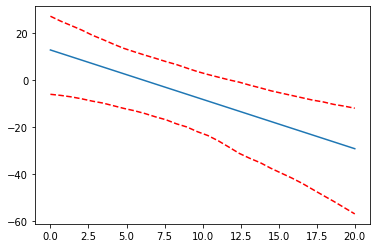

In [9]:
# Optional: you can use my "boot_ypred" if needed here, just uncomment the line below
#boot_ypred = pd.read_csv("part1_6.csv").values; boot_x_new = np.linspace(0, 20, 30)

# Here we are creating lower and upper quantiles for a 95% Confidence Interval 
# around the provided prediction line using np.quantile. 
lower = np.quantile(boot_ypred - ypr_ols, 0.025, axis=0)
upper = np.quantile(boot_ypred - ypr_ols, 0.975, axis=0)

# Here we plot the provided prediction line with the 95% confidence interval margin
plt.plot(boot_x_new, ypr_ols)
plt.plot(boot_x_new, ypr_ols - upper, 'r--') # subtract upper quantile to get a lower bound
plt.plot(boot_x_new, ypr_ols - lower, 'r--')# subtract lower quantile to get an upper bound

# In the code above we have plotted the 95% confidence interval for the prediction line from x=0 to x=20 
# Compute the 95% confidence interval for the prediction line at x=0. A is the lower bound, B is the upper bound.
# ****** your code here ****** [ /2 marks]
A = np.quantile(boot_ypred[0] - ypr_ols[0], 0.025, axis=0)# ** your code here ** [ /2 marks]
B = np.quantile(boot_ypred[0] - ypr_ols[0], 0.975, axis=0)
print(f"Confidence interval: [{A},{B}]")
#another way
A=ypr_ols[0]-lower[0]
B=ypr_ols[0]-upper[0]
print(f"Confidence interval: [{A},{B}]")

## Part 2: Maximum Likelihood Estimation [ _ /16 marks]

Consider the Poisson distribution. This distribution is well-suited for count-based data. The Poisson pdf and negative log likelihood are defined as follows:

Probability Density Function (PDF):
$$ f(y; \lambda) = \frac{\lambda^{-y} \exp(-\lambda)}{y!}$$

Negative Log Likelihood (NLL):
$$\ell(y_1,y_2,...,y_n; \lambda)=-\sum_{i=1}^{n}(y \log(\lambda))-\lambda-y!$$

*Potentially Helpful Code for this part*: Assignment 2 code ("A2_S.ipynb") and the Week 1 to 6 review code ("Week1-6-Code_ReviewF.ipynb")

## Question 2.1 [ _ /4 marks]

Create a function called `poisson_nll` which takes arguments `lam` (expected rate of occurence) and `y` (count of occurrences) and returns the poisson negative log likelihood (`nll`). **NOTE: instead of y!, type `gammaln(y+1)`**. The gammaln function has been imported for you.

In [10]:
# define the negative log likelihood function
def poisson_nll(lam, y):
    # Note: use gammaln(y+1) instead of y!.
    # ****** your code here ******
    nll=-np.sum((y*np.log(lam))-(lam)-(gammaln(y+1)))
    return nll

# Uncomment this part if you want to check your function
check_func_lam = 2
check_func_y = np.array([3,2])
print(poisson_nll(check_func_lam,check_func_y)) 
# The result of the print statement should be 3.019170746988274

3.019170746988274


## Question 2.2 [ _ /6 marks]

Create a function called `poisson_nll_regression` which takes arguments for model coefficients $\mathbf{b}$, a design matrix of features $\mathbf{X}$ (including a column of ones and a column of x-values), and counts $\mathbf{y}$ and returns the negative log likelihood. You can assume that $\mathbf{y}$ is i.i.d (independent and identically distributed) with a poisson distribution characterized by parameter $\lambda = \exp(X b)$.

In [11]:
# define negative log likelihood in terms of lambda and the function form for your linear regression
def poisson_nll_regression(b, X, y):
    # ****** your code here ****** [ /3 marks]
    # ****** your code here ****** [ /3 marks]
    lam=np.exp(X@b)
    nll = poisson_nll(lam,y)
    return nll

# Uncomment this part if you want to check your function
check_func_b = np.array([1,1.2])
check_func_X = np.array([[1,2],[1,3.2]])
check_func_y = np.array([3,2])
print(poisson_nll_regression(check_func_b,check_func_X,check_func_y))
# The result of the print statement should be 139.03835842729978

139.03835842729978


## Question 2.3 [ _ /6 marks]

The dataset `part2.csv` contains count data (y) which has been influenced by a single feature (x). Plot the data; also plot the poisson maximumum likelihood regression prediction curve on new data (use `np.linspace` to generate 100 points from $x=-5$ to $x=5$). 

Note: An estimate for the optimal fit parameters (`bpr`) has been provided for this question.  

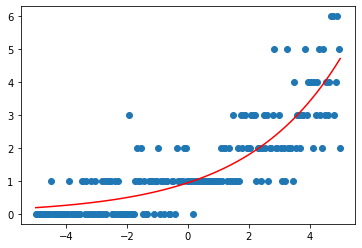

In [12]:
# The optimal model coefficient values are provided
b0, b1 = -0.054007750104876455, 0.3209514537121639

# Read the part2.csv file into a dataframe (df2), plot the data [ /2 marks]
# ****** your code here ******
# ****** your code here ****** 
df2=pd.read_csv("part2.csv")
plt.scatter(df2.x,df2.y)

# Given the b0,b1 coefficients, plot the prediction curve [ /4 marks]
# ****** your code here ******
# ****** your code here ****** 
# ****** your code here ****** 
# ****** your code here ****** 
b=[b0,b1]
xx=np.linspace(-5,5,100)
XX=np.c_[np.ones(len(xx)),xx]
ypr=np.exp(XX@b)
plt.plot(xx,ypr,color="red")



## Part 3: Classification and Evaluation [ _ /23 marks]

For this final part, let's consider the mushroom dataset (it has been modified and re-named `part3_1.csv`). If you would like to read more on the dataset, go to https://archive.ics.uci.edu/ml/datasets/mushroom

Importantly, this dataset has two output classes: `e` (edible) and `p` (poisonous). Assume that `p` is the positive class. Let's attempt to fit the data using **Logistic Regression** with **L1 Regularization**.

*Potentially Helpful Code for this part*: Assignment 3/4 code ("A3_S.ipynb", "A4_S.ipynb") and the Week 1-6 review code ("Week1-6-Code_ReviewF.ipynb")

### Question 3.1 [ _ /5 marks]

Read the file `part3_1.csv` into a dataframe. Print the first 5 rows of the dataframe. Would `automatic` or `manual` feature selection be preferable in this circumstance? Why? Provide your answer in 1-2 sentences [ _ /3 marks].

* By **automatic feature selection**, I am referring to feature selection wherein features are removed without human input (for example, regularization). 
* By **manual feature selection**, I am referring to feature selection wherein a person (i.e. you) is choosing which features to remove.

In [13]:
# read the csv into a dataframe [ /1 mark]
# ****** your code here ******
df=pd.read_csv("part3_1.csv")

# display the first 5 rows [ /1 mark]
# ****** your code here ******
df.head()

,CLASS,cap-shape,cap-surface,cap-color,ring-number,ring-type,spore-print-color
0,p,x,s,n,o,p,k
1,e,x,s,y,o,p,n
2,e,b,s,w,o,p,n
3,p,x,y,w,o,p,k
4,e,x,s,g,o,e,n


**Your answer**:  Manual feature selection would be preferrable in this case.
The data has less number of features and we can simply drop the ones which we think is not much relatable or useful.

### Question 3.2 [ _ /5 marks]

Let's convert all of our data into numerical values using `get_dummies` (use `drop_first=True`). Note: You only need the one line of code to call "get_dummies"; you do not need to use `pd.Categorical` here. Display the first 5 rows. Report the number of resulting "features" [ _ /2 marks]. 

In [14]:
# Use get_dummies to convert features to numeric values [ /2 marks]
# ****** your code here ******
df = pd.get_dummies(df, drop_first=True)

# display the first 5 rows [ /1 mark]
# ****** your code here ******
display(df.head())

,CLASS_p,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_g,cap-surface_s,cap-surface_y,cap-color_c,...,ring-type_n,ring-type_p,spore-print-color_h,spore-print-color_k,spore-print-color_n,spore-print-color_o,spore-print-color_r,spore-print-color_u,spore-print-color_w,spore-print-color_y
0,1,0,0,0,0,1,0,1,0,0,...,0,1,0,1,0,0,0,0,0,0
1,0,0,0,0,0,1,0,1,0,0,...,0,1,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,...,0,1,0,0,1,0,0,0,0,0
3,1,0,0,0,0,1,0,0,1,0,...,0,1,0,1,0,0,0,0,0,0
4,0,0,0,0,0,1,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0


**Your answer**:There are 31 Input features and 1 target output.

### Question 3.3 [ _ /5 marks]

Let's perform our Logistic Regression using sklearn:
* First, create your design matrix $\mathbf{X}$ and output (target) vector $\mathbf{y}$, then split your data into training and test sets using sklearn's `train_test_split`. Use `test_size=0.3`, `random_state=0`. 
* Next, apply **2-fold Cross-Validation** on your training set using the provided model `M`: this is a Logistic Regression Pipeline which has been created for convenience. Use `scoring='neg_log_loss'`. Print the mean CV score.

In [15]:
# In order to help keep the questions independent (i.e. not reliant on the previous question),
# I have created a dataframe for this question called "part3_3.csv". It is read into df33 below:
df33 = pd.read_csv("part3_3.csv")#; display(df33.head()) #You can check this with your answer
display(df33.head())
# First, create X and y from the dataframe df33 [ /2 marks]
# ****** your code here ******
# ****** your code here ******
X = df33.drop('CLASS_p', axis = 'columns')
y = df33.CLASS_p


# Next, call train_test_split [ /1 mark]
# ****** your code here ******
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.3, random_state=0) 
# A Model Pipeline (M) has been created for you:
M = Pipeline([
    ['scl', StandardScaler()],
    ['logr', LogisticRegression(C=1, max_iter=2000, penalty='l1', solver='saga')]
])

# Apply 2-fold Cross-Validation, print the mean CV score [ /2 marks]
# ****** your code here ****** 
cvsc=cross_val_score(M, Xtrain, ytrain,cv=2,scoring = 'neg_log_loss')
print(cvsc)
print(cvsc.mean())

,CLASS_p,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_g,cap-surface_s,cap-surface_y,cap-color_c,...,ring-type_n,ring-type_p,spore-print-color_h,spore-print-color_k,spore-print-color_n,spore-print-color_o,spore-print-color_r,spore-print-color_u,spore-print-color_w,spore-print-color_y
0,1,0,0,0,0,1,0,1,0,0,...,0,1,0,1,0,0,0,0,0,0
1,0,0,0,0,0,1,0,1,0,0,...,0,1,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,...,0,1,0,0,1,0,0,0,0,0
3,1,0,0,0,0,1,0,0,1,0,...,0,1,0,1,0,0,0,0,0,0
4,0,0,0,0,0,1,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0


[-0.11425887 -0.11940866]
-0.11683376430463083


### Question 3.4 [ _ /5 marks]

After performing a Grid search for an optimal regularization coefficient, we selected a particular model. Next, we trained this model on the training set; finally, we computed the model's predictions on the test set. Finally, we generated and plotted a confusion matrix:

![title](part3_4.png)

We can now evaluate our chosen model. Complete the following:
* Using the result (i.e. the Confusion Matrix), compute the F-Measure and print this value.
* Answer: "How many instances of Type II Error are there in our result?" 

The formulas needed are provided below:

$$\text{F-measure} = 2 \bigg( \frac{(\text{Precision})(\text{Recall})}{\text{Precision}+\text{Recall}}  \bigg) $$
<br>
$$\text{Precision} = \bigg( \frac{\text{True Positive}}{\text{True Positive} + \text{False Positive}}  \bigg) $$
<br>
$$\text{Recall} = \bigg( \frac{\text{True Positive}}{\text{True Positive} + \text{False Negative}}  \bigg) $$


In [16]:
# Compute and print the f-measure [ /3 marks]

ypr = M.fit(Xtrain,ytrain).predict(Xtest)

def compute_performance(yhat, y, classes):
    tp = sum(np.logical_and(yhat == classes[1], y == classes[1]))
    tn = sum(np.logical_and(yhat == classes[0], y == classes[0]))
    fp = sum(np.logical_and(yhat == classes[1], y == classes[0]))
    fn = sum(np.logical_and(yhat == classes[0], y == classes[1]))

    print(f"tp: {tp} tn: {tn} fp: {fp} fn: {fn}")
    acc = (tp + tn) / (tp + tn + fp + fn)
    
    # "Of the ones I labeled +, how many are actually +?"
    precision = tp / (tp + fp)
    
    # "Of all the + in the data, how many do I correctly label?"
    recall = tp / (tp + fn)    
    sensitivity = recall
    
    # "Of all the - in the data, how many do I correctly label?"
    specificity = tn / (fp + tn)
        
    print("Accuracy:",round(acc,3),"Recall:",round(recall,3),"Precision:",round(precision,3),
          "Sensitivity:",round(sensitivity,3),"Specificity:",round(specificity,3))
    
compute_performance(ypr,ytest,M.classes_)
# ****** your code here ******
# ****** your code here ****** 
# ****** your code here ****** 
# ****** your code here ****** 
f_measure=2*((0.973*0.931)/(0.973+0.931 ))
print("F-Measure",f_measure)

tp: 1085 tn: 1242 fp: 30 fn: 81
Accuracy: 0.954 Recall: 0.931 Precision: 0.973 Sensitivity: 0.931 Specificity: 0.976
F-Measure 0.9515367647058823


#### How many instances of Type II Error are there in our result? [ /2 marks]

**Your Answer**: There are 81 instances of type 2 error.

### Question 3.5 [ _ /3 marks]

The dataframe below showcases which features were removed from applying Logistic Regression to the mushroom dataset with an `unknown` regularizer: `True` indicates that the feature is kept, `False` indicates that it is removed (Note: it is removed **only** because the coefficient multiplying that feature is 0). 

Which of the three regularizers which we have looked at so far (`LASSO`, `Ridge`, `Elastic Net`) could have been used to get this result?

In [17]:
# Run this code to display the csv file for the question
df35 = pd.read_csv("part3_5.csv", index_col=0); display(df35)

,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_g,cap-surface_s,cap-surface_y,cap-color_c,cap-color_e,...,ring-type_n,ring-type_p,spore-print-color_h,spore-print-color_k,spore-print-color_n,spore-print-color_o,spore-print-color_r,spore-print-color_u,spore-print-color_w,spore-print-color_y
keep_feature,True,True,True,False,True,False,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True


#### Could LASSO have been used to get this result (i.e. can LASSO remove features)? [ /1 mark]
**Your answer (yes or no)**: Yes 

#### Could Ridge have been used to get this result (i.e. can Ridge remove features)? [ /1 mark]
**Your answer (yes or no)**: No

#### Could Elastic Net have been used to get this result (i.e. can Elastic Net remove features)? [ /1 mark]
**Your answer (yes or no)**: No